In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

Skipping, found downloaded files in "./face-mask-dataset" (use force=True to force download)


In [ ]:
import pickle
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os
import random


In [ ]:
Directory = "/content/face-mask-dataset/data"
categories = ["with_mask","without_mask"]

with_mask: 0
without_mask: 1


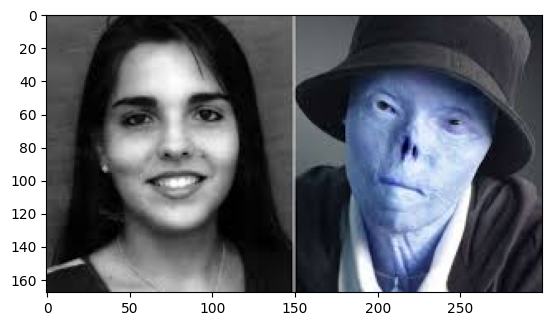

In [ ]:
Image_size = 255
data = []

for category in categories:
  folders = os.path.join(Directory,category)
  label = categories.index(category)
  print(f"{category}:",label)

  for img in os.listdir(folders):
    img_path = os.path.join(folders,img)
    img_arr = cv2.imread(img_path)
    img_arr_resize = cv2.resize(img_arr,(Image_size,Image_size))
    plt.imshow(img_arr)
    #break
    data.append([img_arr_resize,label])




In [ ]:
len(data)

7553

In [ ]:
random.shuffle(data)

In [ ]:
random.shuffle(data)

In [ ]:
len(data)

7553

In [ ]:
type(data[0])

list

In [ ]:
data[0]

[array([[[ 57,  47,  35],
         [ 57,  47,  35],
         [ 57,  47,  35],
         ...,
         [ 47,  40,  25],
         [ 47,  40,  25],
         [ 47,  40,  25]],
 
        [[ 57,  47,  35],
         [ 57,  47,  35],
         [ 57,  47,  35],
         ...,
         [ 47,  40,  25],
         [ 47,  40,  25],
         [ 47,  40,  25]],
 
        [[ 58,  47,  35],
         [ 58,  47,  35],
         [ 58,  47,  35],
         ...,
         [ 47,  40,  25],
         [ 47,  40,  25],
         [ 47,  40,  25]],
 
        ...,
 
        [[148, 152, 176],
         [146, 151, 176],
         [145, 150, 175],
         ...,
         [119,  89,  82],
         [115,  85,  79],
         [111,  82,  76]],
 
        [[149, 153, 177],
         [146, 151, 176],
         [145, 151, 175],
         ...,
         [115,  85,  78],
         [112,  82,  76],
         [110,  81,  74]],
 
        [[150, 154, 178],
         [148, 154, 178],
         [147, 152, 177],
         ...,
         [111,  81,  74],
  

In [ ]:
x = []
y = []

for features,labels in data:
  x.append(features)
  y.append(labels)

In [ ]:
len(y)

7553

In [ ]:
len(x)

7553

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(7553, 255, 255, 3)

In [ ]:
y.shape

(7553,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(6042, 255, 255, 3)

In [ ]:
x_test.shape

(1511, 255, 255, 3)

In [ ]:
y_train.shape

(6042,)

In [ ]:
y_test.shape

(1511,)

In [ ]:
#X_train_scaled = x_train/255

In [ ]:
#X_train_scaled[0]

In [ ]:
#X_test_scaled = x_test/255

In [ ]:
# Importing the necessary libraries for building the model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten,Dense

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=(255,255,3)))
cnn.add(MaxPooling2D(1,1))
cnn.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(1,1))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=128,kernel_size=(1,1),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=128,kernel_size=(1,1),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(512,activation="relu"))
cnn.add(Dense(300,activation="relu"))
cnn.add(Dense(200,activation="relu"))
cnn.add(Dense(4,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 255, 255, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 255, 255, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 255, 255, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 127, 127, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 128)         │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 31, 31, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      14,746,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 300)                 │         153,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,010,264 (57.26 MB)

 Trainable params: 15,010,264 (57.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [ ]:
history = cnn.fit(x,y,epochs=10,validation_split=0.1)

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 54s 211ms/step - accuracy: 0.5477 - loss: 6.3797 - val_accuracy: 0.7222 - val_loss: 0.5614
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - accuracy: 0.8272 - loss: 0.4170 - val_accuracy: 0.8810 - val_loss: 0.2906
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.8700 - loss: 0.3098 - val_accuracy: 0.5741 - val_loss: 1.4352
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 39s 184ms/step - accuracy: 0.8795 - loss: 0.2905 - val_accuracy: 0.6971 - val_loss: 0.5853
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 39s 184ms/step - accuracy: 0.8091 - loss: 0.4205 - val_accuracy: 0.8902 - val_loss: 0.2842
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.8765 - loss: 0.2793 - val_accuracy: 0.8915 - val_loss: 0.2658
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.9211 - loss: 0.2078 - val_accuracy: 0.8981 - val_loss: 0.2612
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - accuracy: 0.9106 - loss: 0

In [ ]:
loss,accuracy = cnn.evaluate(x_test,y_test)
print("Test accuracy:",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9528 - loss: 0.1414
Test accuracy: 0.9490403532981873


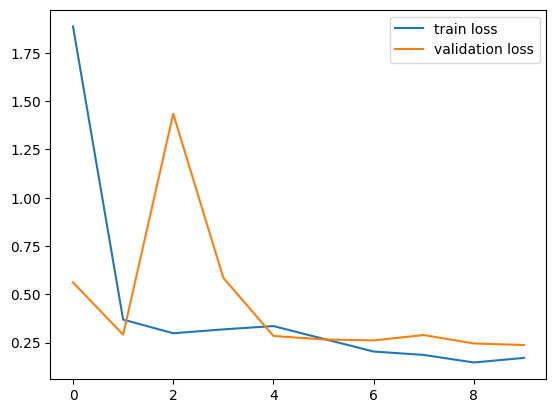

In [ ]:
plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show()

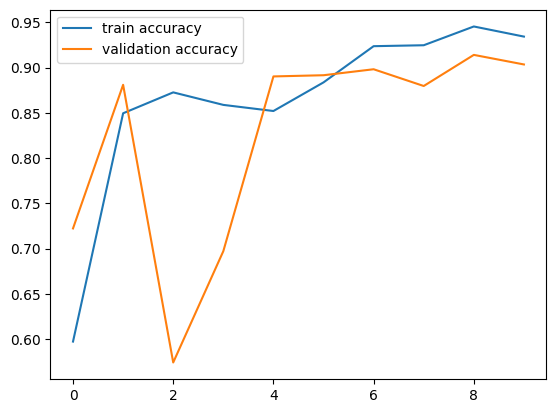

In [ ]:
plt.plot(history.history["accuracy"],label="train accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
"""
input_image_path = input("Enter the link:")
input_image = cv2.imread(input_image_path)
#cv2.imshow(input_image)
input_image_resize = cv2.resize(input_image,(255,255))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_resize,[1,225,225,3])
input_predict = cnn.predict(input_image_reshaped)
print(input_predict)

input_predict_label = np.argmax(input_predict)
print(input_predict_label)

if input_predict_label == 1:
  print("The Person in image is wearing the Mask")
else:
  print("The Person in image is not wearing the Mask")
"""

'\ninput_image_path = input("Enter the link:")\ninput_image = cv2.imread(input_image_path)\n#cv2.imshow(input_image)\ninput_image_resize = cv2.resize(input_image,(255,255))\ninput_image_scaled = input_image_resize/255\ninput_image_reshaped = np.reshape(input_image_resize,[1,225,225,3])\ninput_predict = cnn.predict(input_image_reshaped)\nprint(input_predict)\n\ninput_predict_label = np.argmax(input_predict)\nprint(input_predict_label)\n\nif input_predict_label == 1:\n  print("The Person in image is wearing the Mask")\nelse:\n  print("The Person in image is not wearing the Mask")\n'

In [ ]:
#from tensorflow.keras.preprocessing import image

In [ ]:
"""
img=cv2.imread('/content/th.jpeg')
img=cv2.resize(img,(255,255))
img_array = np.array(img)
img_array = img_array.reshape(1,255,255,3)
"""

In [100]:
"""
img = image.load_img('/content/th.jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()
"""

"\nimg = image.load_img('/content/th.jpeg')\nplt.imshow(img,interpolation='nearest')\nplt.show()\n"

In [ ]:
"""
a=cnn.predict(img_array)
indeces = a.argmax()
print(indeces)
if indeces == 1:
    print("The Person in image is wearing the Mask")
else:
  print("The Person in image is not wearing the Mask")
"""

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0
The Person in image is not wearing the Mask


In [82]:
pred=cnn.predict(x_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [83]:
index=[np.argmax(i) for i in pred]

In [87]:
new_dataframe = pd.DataFrame({"actual":y_test,"predict":index})
print(new_dataframe)

      actual  predict
0          0        0
1          0        0
2          1        1
3          0        0
4          1        1
...      ...      ...
1506       0        0
1507       0        0
1508       1        1
1509       0        1
1510       1        1

[1511 rows x 2 columns]


In [101]:
img=cv2.imread('/content/without.jpeg')
img=cv2.resize(img,(255,255))
img_array = np.array(img)
img_array = img_array.reshape(1,255,255,3)

In [97]:
from tensorflow.keras.preprocessing import image

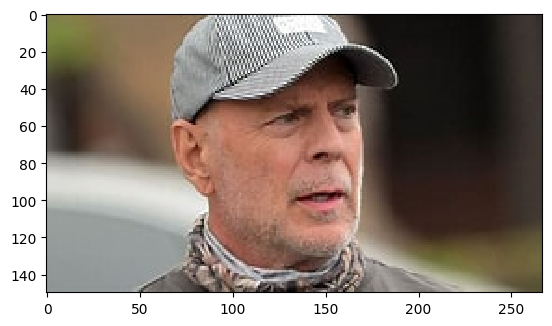

In [102]:
img = image.load_img('/content/without.jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [103]:
a=cnn.predict(img_array)
indeces = a.argmax()
print(indeces)
if indeces == 0:
    print("The Person in image is wearing the Mask")
else:
  print("The Person in image is not wearing the Mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1
The Person in image is not wearing the Mask
